In [ ]:
# Uncomment to install the dependencies 
#!pip install seaborn

# Expolatory Data Analyis

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import warnings
if not sys.warnoptions:               # To ignore all types of warning messages 
    warnings.simplefilter("ignore")
    

sns.set(rc={'figure.figsize':(11,8)})

In [11]:
df =pd.read_pickle("feature_final.pkl")
df.head()

,tonnetz_mean_1,tonnetz_mean_2,tonnetz_mean_3,tonnetz_mean_4,tonnetz_mean_5,tonnetz_mean_6,tonnetz_std_1,tonnetz_std_2,tonnetz_std_3,tonnetz_std_4,...,mel_spect_std_123,mel_spect_std_124,mel_spect_std_125,mel_spect_std_126,mel_spect_std_127,mel_spect_std_128,rmse_mean,rmse_std,music_name,Genre
0,0.009441,0.061125,-0.005547,0.046216,0.002150,0.020969,0.027811,0.056467,0.047940,0.060074,...,0.266111,0.230143,0.182443,0.132342,0.041315,0.003829,0.145178,0.078912,Food,Hip-Hop
1,0.001029,-0.005705,0.010906,0.038095,0.001257,-0.012211,0.039079,0.025971,0.075580,0.058695,...,0.026175,0.032868,0.043989,0.030101,0.009164,0.000639,0.148776,0.080983,This World,Hip-Hop
2,-0.067273,-0.088674,-0.000412,-0.072081,0.010268,0.017728,0.038573,0.047049,0.064518,0.048021,...,0.052758,0.060249,0.082054,0.051162,0.009752,0.000777,0.188128,0.044865,Freeway,Pop
3,0.063295,0.174332,-0.094739,-0.012694,-0.029565,-0.021513,0.205562,0.174711,0.169259,0.274292,...,0.020532,0.019369,0.029723,0.016679,0.006230,0.000486,0.069225,0.038056,Queen Of The Wires,Folk
4,-0.017803,0.147449,-0.066039,-0.089968,0.007785,-0.001817,0.211706,0.151958,0.244264,0.187532,...,0.029067,0.025548,0.022800,0.013572,0.004673,0.000288,0.101333,0.078156,Ohio,Folk


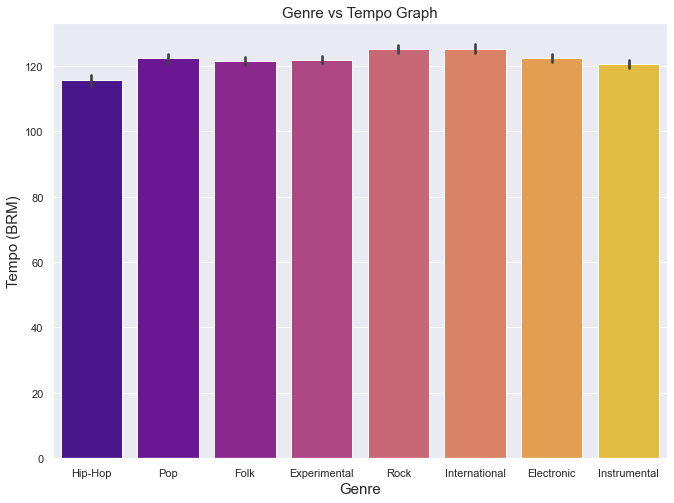

In [6]:
# Ploting bar graph exploring the tempo range of different genres
sns.barplot(y="tempo",x='Genre',palette='plasma',data=df)
plt.title("Genre vs Tempo Graph" , size =15)
plt.xlabel("Genre",size=15)
plt.ylabel("Tempo (BRM)",size=15)
plt.show()

Visiually they all more or less like in the same range It is quite imposiible to recognising the genre just based on tempo.

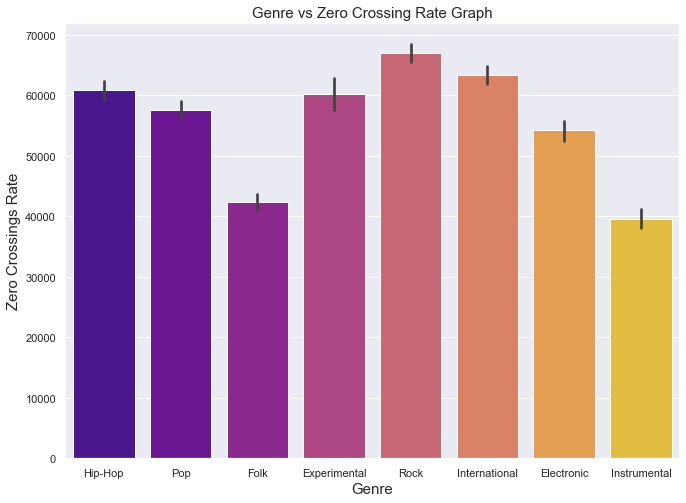

In [5]:
#Plotting bar graph between genres and zero_crossing_rate
sns.barplot(y="zero_crossing_rate",
            x='Genre',palette='plasma',data=df,
            )
plt.title("Genre vs Zero Crossing Rate Graph" , size =15)
plt.xlabel("Genre",size=15)
plt.ylabel("Zero Crossings Rate",size=15)
plt.show()

Rock , International and Hip Hop seemes to have more number of zero crossing rate.

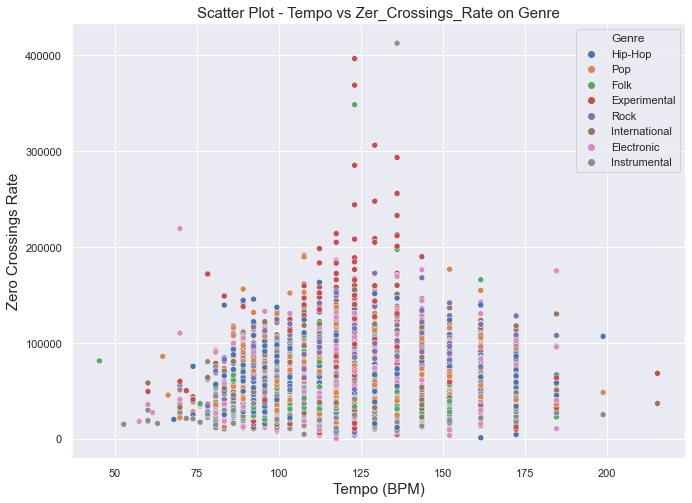

In [6]:
#Plotting scatter plot between zero_crossing_rate and tempo based on the genre
sns.scatterplot(y= "zero_crossing_rate",
                x="tempo",
                hue='Genre',
                data=df)
plt.title("Scatter Plot - Tempo vs Zer_Crossings_Rate on Genre" , size =15)
plt.xlabel("Tempo (BPM)",size=15)
plt.ylabel("Zero Crossings Rate",size=15)
plt.show()

## Principle Component Analysis

Large datasets are increasingly common and are often difficult to interpret. Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance. Finding such new variables, the principal components, reduces to solving an eigenvalue/eigenvector problem, and the new variables are defined by the dataset at hand, not a priori, hence making PCA an adaptive data analysis technique. It is adaptive in another sense too, since variants of the technique have been developed that are tailored to various different data types and structures. 

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

feature = df.drop(['Genre','music_name'], axis=1)
target = df['Genre']

pca = PCA(n_components =2)
mmsc = MinMaxScaler()
feature_pca = mmsc.fit_transform(feature)
pca.fit(feature_pca)
reduced =pca.transform(feature_pca)

pca_Df = pd.DataFrame(data = reduced )
finalDf = pd.concat([pca_Df, df[['Genre']]], axis = 1)

finalDf.head()


,0,1,Genre
0,-0.832939,-0.075216,Hip-Hop
1,-0.799725,-0.260608,Hip-Hop
2,-0.959769,0.301207,Pop
3,0.868186,-0.595090,Folk
4,0.865072,-0.597107,Folk


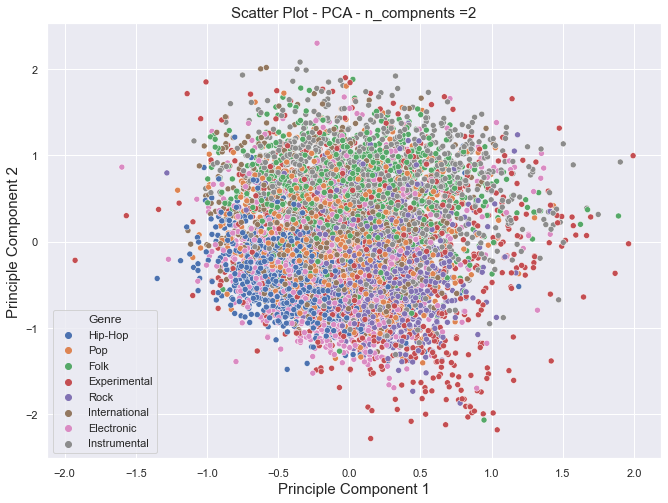

In [8]:
# Using scatter plot to visualize the PCA components with their correponding genre
sns.scatterplot(y= 0,
                x= 1,
                hue='Genre',
                data=finalDf)
plt.title("Scatter Plot - PCA - n_compnents =2" , size =15)
plt.xlabel("Principle Component 1",size=15)
plt.ylabel("Principle Component 2",size=15)
plt.show()

It is visually impossible to group genre the different as most of the characterists overlap with each other.

# Building Model

### Spliting the Dataset for Training and Testing

In [12]:
# Select Features
feature = df.drop(['Genre','music_name'], axis=1)

# Select Target
target = df['Genre']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (6400, 390)
Shape of testing feature: (1600, 390)
Shape of training label: (6400,)
Shape of training label: (1600,)


### Feature Scaling 

In [13]:
# Standardizing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Decision Tree Classifier

In [14]:
from sklearn import tree
from sklearn import metrics


# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

#Model Metrics

print("               Accuracy  :", metrics.accuracy_score(y_test,dtc_pred))
print(f"Macro-Averaged F1 score  : {metrics.f1_score(y_test, dtc_pred, average = 'macro')}")

               Accuracy  : 0.375
Macro-Averaged F1 score  : 0.3738252472285338


### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier


# Buliding Random Forest Model
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

#Model Metrics

print("               Accuracy  :", metrics.accuracy_score(y_test,rf_pred))
print(f"Macro-Averaged F1 score  : {metrics.f1_score(y_test, rf_pred, average = 'macro')}")


               Accuracy  : 0.5225
Macro-Averaged F1 score  : 0.5125226686851212


### K- Nearest Neighbors (KNN) 

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Buliding KNN Model
knn=KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

#Model Metrics

print("               Accuracy  :", metrics.accuracy_score(y_test,knn_pred))
#print(f"Macro-averaged Precision score : {metrics.precision_score(y_test, dtc_pred ,average = 'macro')} ")
#print(f"Micro-averaged Precision score : {metrics.precision_score(y_test, dtc_pred,average = 'micro')}")
print(f"Macro-Averaged F1 score  : {metrics.f1_score(y_test, knn_pred, average = 'macro')}")
#print(f"Micro-Averaged F1 score  : {metrics.f1_score(y_test, rf_pred, average = 'micro')}")


               Accuracy  : 0.47625
Macro-Averaged F1 score  : 0.4546418800036316


### Support Vector Machine

In [17]:
from sklearn.svm import SVC
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier



# Buliding SVC Model
svc=SVC(C=1,kernel='poly',gamma=1)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

#Model Metrics

print("               Accuracy  :", metrics.accuracy_score(y_test,svc_pred))
print(f"Macro-Averaged F1 score  : {metrics.f1_score(y_test, svc_pred, average = 'macro')}")

               Accuracy  : 0.51
Macro-Averaged F1 score  : 0.5011465063560686


### XGBoost 

In [18]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer


#Buliding a XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

#Model Metrics

print("               Accuracy  :", metrics.accuracy_score(y_test,xgb_pred))
print(f"Macro-Averaged F1 score  : {metrics.f1_score(y_test, xgb_pred, average = 'macro')}")


[23:17:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
               Accuracy  : 0.58375
Macro-Averaged F1 score  : 0.5768388118036736


# Conclusion

We can clearly see that the accuracy and F1 score of the model keep increasing with increase in te model complex.
XGBoost gave out a accuracy of 58.3 % which is the highest. All the algorithm were more or the less run on their default settings so , hyperparamter tuning make increase the results . I am planning to expolre Artifical Neural Networks and how effective they can be in can be . Most of the recent work in music information retirval revolves around using Mel-Frequency Cepstral Coefficients (MFCCs) and MEl Spectrum soley to extract features . Building a CNN and analysis the MEL scale spectrums is a good idea. The future work of this projects also includes deploying the model in a cloud platform and developing a web app.

# Refrences

1.[https://www.researchgate.net/publication/352302478_Music_Genre_Classification_Looking_for_the_Perfect_Network]  
2.[https://www.analyticssteps.com/blogs/music-genre-classification-using-machine-learning]  
3.[https://www.irjet.net/archives/V6/i12/IRJET-V6I12418.pdf]  
4.[https://devitrylouis.github.io/files/paper_music.pdf].  
5.[https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwjksoXqiNH0AhVEXc0KHaQ5AuM4ChAWegQIAxAB&url=https%3A%2F%2Fpublikationen.bibliothek.kit.edu%2F1000118785%2F71295164&usg=AOvVaw2N9vECiEJEAFlpi3ft0FRd]
